<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

## Alumno: Pablo Matías Monsalvo G8-ONE 26/06/2025

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd # import pandas for data manipulation

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [2]:
datos = pd.read_csv('../data/dataset.csv', sep=';')

## Ver los datos

In [3]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374


##  04 Obteniendo información de un DataFrame de pandas
Hay varias formas de obtener información de un DataFrame de pandas. Podemos identificar el conjunto de variables que componen el DataFrame y sus respectivos tipos a través de la propiedad dtypes, y también podemos obtener información más completa de un DataFrame usando el método info().

Usando su conocimiento de pandas, verifique a continuación las alternativas que informan sólo el número de registros en un DataFrame:

* ### len(DataFrame)
¡Correcta! La función len() de Python también informa el número de líneas en un DataFrame.

* ### DataFrame.shape[0]
¡Correcta! Usando solo .shape, obtenemos una tupla con el número de registros y también el número de columnas del DataFrame.

## Verificando el tamaño del dataset

In [4]:
len(datos)

5000

In [5]:
datos.shape

(5000, 4)

## 05 Análisis preliminar


# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [6]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [6]:
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


## Luri: ¡Hola! Claro, puedo ayudarte con eso.

En esta clase, estamos explorando el "análisis preliminar de los datos", que es como hacer una revisión médica antes de comenzar un tratamiento. Imagina que los datos son pacientes y nosotros somos los médicos.

* ### Estadísticos descriptivos:

 Es como tomar los signos vitales del paciente (media, desviación estándar, mínimo, máximo, cuartiles). Nos dan una idea general de la salud del paciente. Por ejemplo, si la variable "valor" tiene un valor máximo muy alto, es como encontrar una presión arterial muy alta, lo que sugiere que algo podría estar mal.

* ### Matriz de correlación:

 Es como verificar si diferentes partes del cuerpo están funcionando bien juntas. Queremos ver cómo se relacionan las variables entre sí.

* ### Correlación positiva:

 Si el área de una casa aumenta y el valor también aumenta, es como si hacer ejercicio (aumentar la actividad física) mejora la salud.

* ### Correlación negativa:

 Si la distancia a la playa aumenta y el valor de la propiedad disminuye, es como si fumar (aumentar el consumo de cigarrillos) empeora la salud.

* ### Variables explicativas:

 Son como los factores que influyen en la salud del paciente. Necesitamos asegurarnos de que estos factores no estén demasiado relacionados entre sí (sin correlación fuerte), para que no nos confundan al hacer el diagnóstico.
 
En resumen, el análisis preliminar de los datos es como una revisión médica completa para entender mejor nuestros datos antes de construir un modelo de regresión lineal. ¿Te gustaría que profundice en algún punto en particular?

##  06 Análisis descriptivo de los datos del modelo
En cuanto el análisis descriptivo de los datos del modelo, verifique la alternativa correcta:

* ### Puede sospechar la presencia de outliers con solo mirar los estadísticos descriptivos reportados por el método describe() de pandas.

¡Correcta! Valores mínimos y máximos muy diferentes de los otros estadísticos pueden hacernos sospechar de la presencia de outliers.

## Luri:
# Detección de Outliers con Estadísticos Descriptivos

¡Por supuesto! Aquí tienes un ejemplo para ilustrar cómo los estadísticos descriptivos pueden ayudarte a identificar posibles outliers:

Imagina que estás analizando los salarios anuales de los empleados de una pequeña empresa. Después de recopilar los datos y aplicar el método `describe()` de pandas, obtienes los siguientes resultados:

- **count:** 20 (número de empleados)
- **mean:** 60000 (salario promedio)
- **std:** 15000 (desviación estándar)
- **min:** 35000 (salario mínimo)
- **25% (Q1):** 50000 (primer cuartil)
- **50% (Q2):** 58000 (mediana)
- **75% (Q3):** 70000 (tercer cuartil)
- **max:** 150000 (salario máximo)

Al observar estos estadísticos, puedes notar que el salario máximo (150000) es significativamente mayor que el tercer cuartil (70000) y la media (60000). Esta gran diferencia sugiere la posible presencia de un outlier, es decir, un empleado con un salario mucho más alto que el resto.

En este caso, sería recomendable investigar más a fondo este valor atípico para determinar si se trata de un error en los datos o de un salario legítimo pero inusual (por ejemplo, el del CEO de la empresa).

**Recuerda** que la detección de outliers mediante estadísticos descriptivos es solo el primer paso. Siempre es importante complementar este análisis con técnicas gráficas y un conocimiento profundo del contexto de los datos.

##  07 Haga lo que hicimos en aula: Análisis preliminar
Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante esta clase:

* **Descargar el proyecto de formación inicial**

* **Importar pandas**

* **Leer y ver los datos**

* **Comprobar el tamaño del dataset**

* **Crear una tabla con estadísticos descriptivos de los datos del dataset**

* **Crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.**

* **Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo que se vio en los videos para poder continuar con el siguiente video.**


##  08 Lo que aprendimos
Lo que aprendimos en esta aula:

* **Como importar la biblioteca pandas.**

* **Como leer y ver los datos.**

* **Como comprobar el tamaño del dataset.**

* **Como crear una tabla con estadísticos descriptivos de los datos del dataset.**

* **Como crear una matriz de correlación a partir de los datos de la tabla de estadísticos descriptivos.**


# 02 - Análisis gráfico

## 02 Comportamiento de la variable dependiente


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [7]:
import seaborn as sns

## Configuración del formato de los gráficos

In [8]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles por Pol Monsalvo && Cia.'}, xlabel='Dolares'>

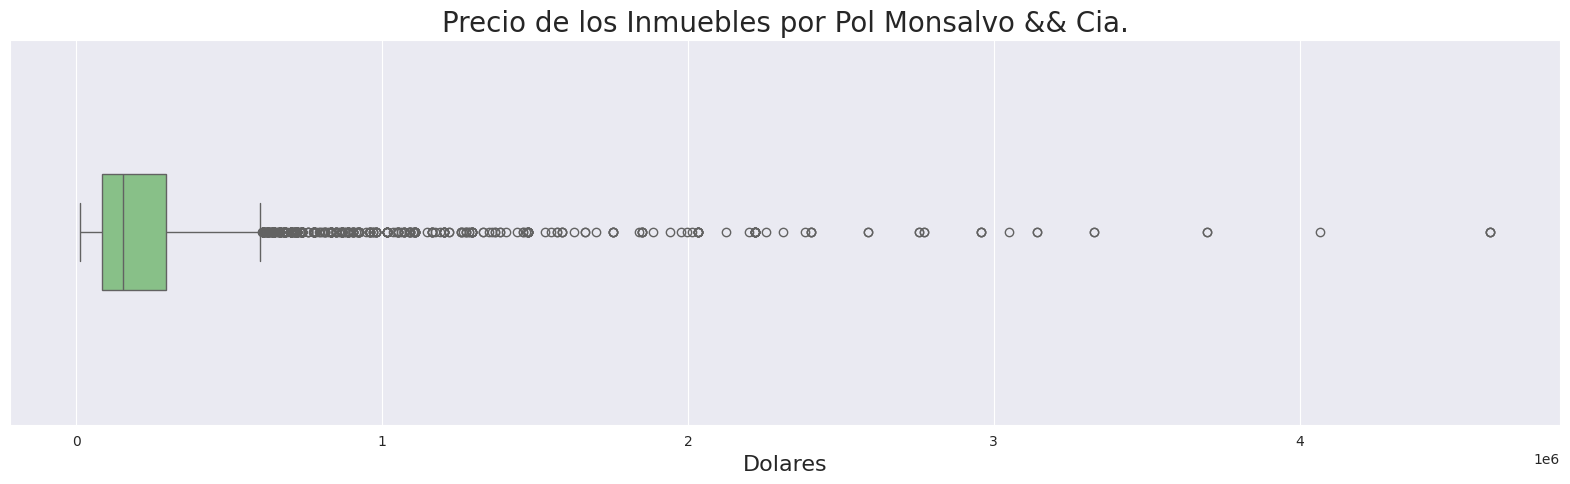

In [9]:
ax=sns.boxplot(data=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles por Pol Monsalvo && Cia.', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

## Luri:
Imagina que eres un detective que está analizando un caso. En lugar de buscar pistas en la escena del crimen, estás buscando patrones en los datos de los precios de los inmuebles.

* ### Preparando el Escenario (Configuración de Seaborn):
Así como un detective necesita sus herramientas (lupa, linterna, etc.), nosotros necesitamos preparar nuestro entorno de visualización. Aquí, estamos usando la biblioteca Seaborn en Python para crear gráficos atractivos y informativos.

* ### sns.set_palette("Accent"):
 Imagina que estás eligiendo el esquema de colores para tu informe. La paleta "Accent" es como elegir colores que resaltan los puntos clave.

* ### sns.set_style("darkgrid"):
 Esto es como elegir el tipo de papel para tu informe. "Darkgrid" nos da un fondo con líneas de cuadrícula oscuras que facilitan la lectura de los datos.

* ### El Boxplot como una Radiografía:
Un boxplot es como una radiografía de nuestros datos. Nos muestra la distribución de los precios de los inmuebles de un vistazo.

La caja en el medio representa el rango donde se encuentra la mayoría de los precios. La línea dentro de la caja es la mediana, el valor central de los precios.

Los "bigotes" (las líneas que se extienden desde la caja) muestran el rango de precios típicos.
Los puntos fuera de los bigotes son como anomalías en la radiografía, ¡podrían ser "outliers"!

* ### Detectando "Outliers" con Cuidado:
Aquí es donde nos ponemos el sombrero de detective. Vemos muchos puntos por encima del límite superior en nuestro boxplot. Estos podrían ser inmuebles con precios muy altos en comparación con el resto.

Pero, ¡cuidado! No todos los puntos fuera de los bigotes son necesariamente errores o datos incorrectos. Algunos inmuebles simplemente tienen características especiales que los hacen más caros.

Es como encontrar huellas en la escena del crimen. No todas las huellas son del culpable, algunas podrían ser de personas que simplemente estaban en el lugar.

* ### Simetría a la Derecha: Una Pista Adicional:
La acumulación de puntos por encima del límite superior sugiere que nuestra distribución de precios tiene una "simetría a la derecha". Esto significa que hay más inmuebles con precios altos que con precios bajos.

Es como notar que la mayoría de las huellas en la escena del crimen apuntan en una dirección. Esto podría indicar la dirección en la que huyó el culpable.

En resumen, estamos utilizando el boxplot como una herramienta para visualizar y comprender la distribución de los precios de los inmuebles. Estamos aprendiendo a identificar posibles "outliers" y a interpretar la simetría de la distribución. ¡Es como resolver un misterio con datos!

¿Te gustaría que te proporcione algunos ejercicios para practicar la creación e interpretación de boxplots?

##  03 Box-plot
Marque la alternativa que indica los estadísticos descriptivos necesarios para construir un box-plot:

### 1º cuartil, mediana y 3º cuartil.
![boxplot.png](/home/pol/Escritorio/ipynb-alura/assets/boxplot.png)

## Luri: 
¡Claro! Aquí tienes un ejemplo para entender mejor los cuartiles y cómo se relacionan con el boxplot:

Imagina que tienes las calificaciones de 20 estudiantes en un examen:

[60, 62, 65, 68, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 95, 98, 100, 100, 100, 100]

* ### Ordenamos los datos:
 Ya están ordenados en este caso.

* ### Calculamos los cuartiles:

* ### Mediana (Q2):
 Es el valor central de los datos. En este caso, como tenemos 20 datos, la mediana será el promedio de los dos valores centrales (el 10º y el 11º): (82 + 85) / 2 = 83.5

* ### Primer cuartil (Q1):
 Es la mediana de la primera mitad de los datos (excluyendo la mediana si el número de datos es impar). En este caso, la primera mitad es: [60, 62, 65, 68, 70, 72, 75, 78, 80, 82]. La mediana de estos datos es (70 + 72) / 2 = 71

* ### Tercer cuartil (Q3):
 Es la mediana de la segunda mitad de los datos. En este caso, la segunda mitad es: [85, 88, 90, 92, 95, 98, 100, 100, 100, 100]. La mediana de estos datos es (95 + 98) / 2 = 96.5

* ### Construimos el boxplot:

La caja del boxplot se extiende desde Q1 (71) hasta Q3 (96.5).

La línea dentro de la caja representa la mediana (83.5).

Los bigotes se extienden hasta los valores mínimo (60) y máximo (100), a menos que haya valores atípicos.

Este boxplot nos daría una idea de la distribución de las calificaciones, mostrando dónde se concentra la mayoría de los estudiantes y si hay valores atípicos (calificaciones inusualmente bajas o altas).

## 04 Distribución de frecuencias


# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/tmp/ipykernel_4952/3091160960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos['Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Precio de los Inmuebles (US$)', ylabel='Density'>

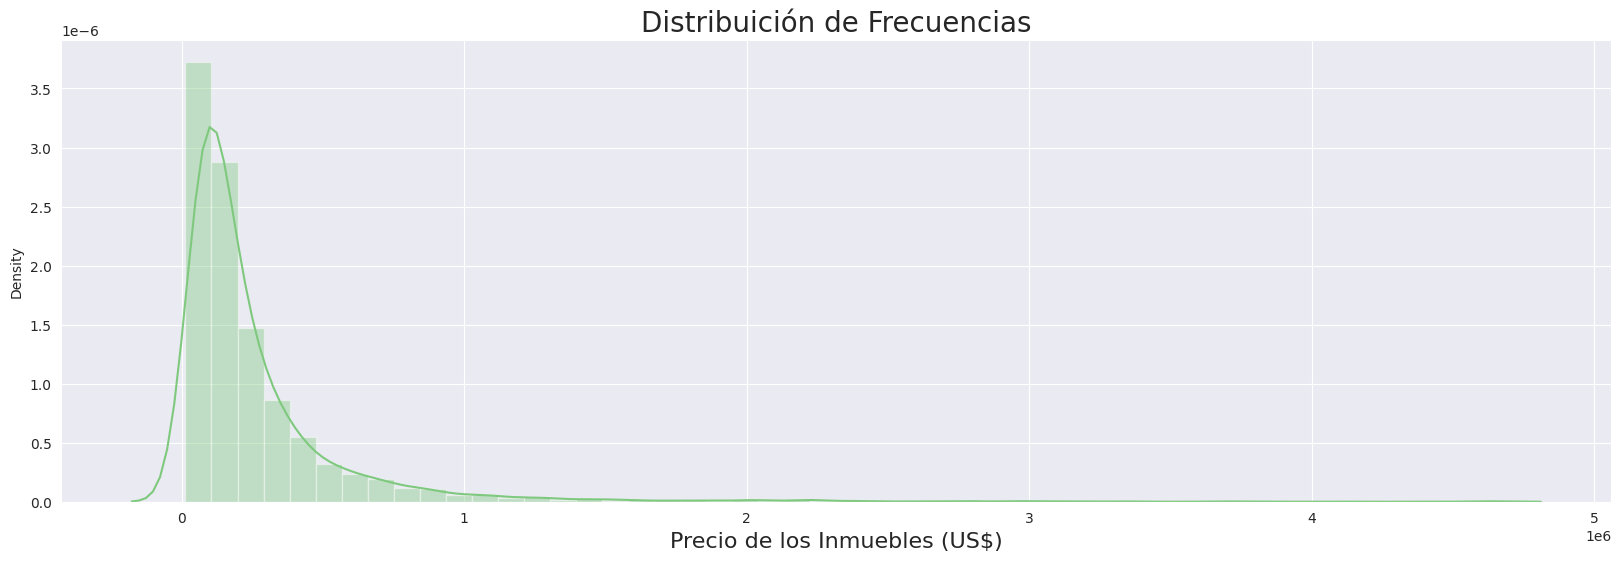

In [10]:
ax=sns.distplot(datos['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
ax

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

## Luri:
¡Hola! En esta clase, estamos explorando cómo analizar la distribución de frecuencias de nuestra variable dependiente, que en este caso son los precios de los inmuebles.

Imagina que tienes una bolsa llena de canicas de diferentes tamaños. La mayoría de las canicas son pequeñas, pero hay algunas muy grandes. Si intentas dibujar un gráfico que muestre cuántas canicas hay de cada tamaño, obtendrás algo similar a un histograma.

En nuestro caso, el histograma muestra que hay muchos inmuebles con precios bajos y pocos con precios muy altos. Esto crea una asimetría en la distribución, lo que significa que no es una distribución normal (como la campana de Gauss).

Esta asimetría puede causar problemas al construir nuestro modelo de regresión lineal, ya que uno de los supuestos teóricos es que la variable dependiente tenga una distribución normal. Es como tratar de encajar una pieza cuadrada en un agujero redondo: ¡no va a funcionar bien!

Para solucionar esto, podemos transformar los datos para que su distribución sea menos asimétrica y se acerque más a una distribución normal. `Es como remodelar la pieza cuadrada para que se ajuste mejor al agujero redondo`.

En resumen, estamos analizando la forma en que se distribuyen los precios de los inmuebles y buscando formas de hacer que esta distribución sea más adecuada para nuestro modelo de regresión lineal. ¿Te gustaría que te explicara algún punto en más detalle o te proporcionara algún ejemplo adicional?

##  05 Asimetría de los datos
En nuestro curso vamos a trabajar con datos asimétricos, como vimos en el último video. Las siguientes alternativas muestran una representación gráfica de los comportamientos de las distribuciones de una variable que se pueden encontrar. ¿Qué imagen es la correcta? 

### Imagen de arriba 

![regresion-1.png](/home/pol/Escritorio/ipynb-alura/assets/regresion-1.png)

## 06 Dispersión entre las variables


# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

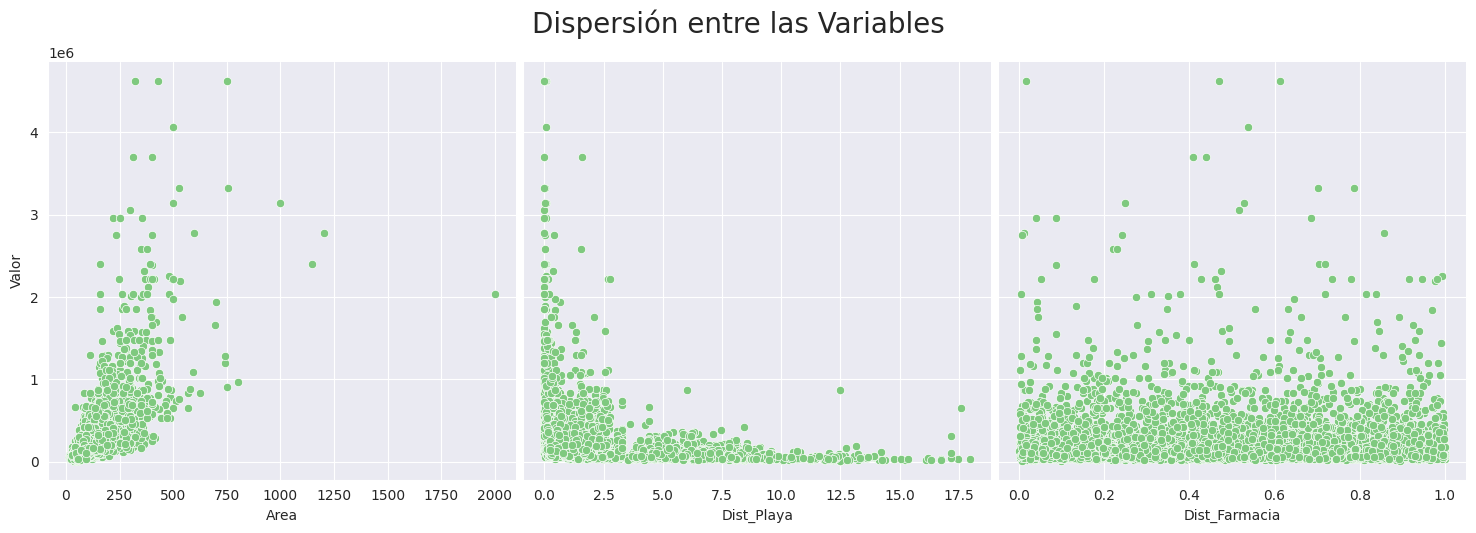

In [11]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

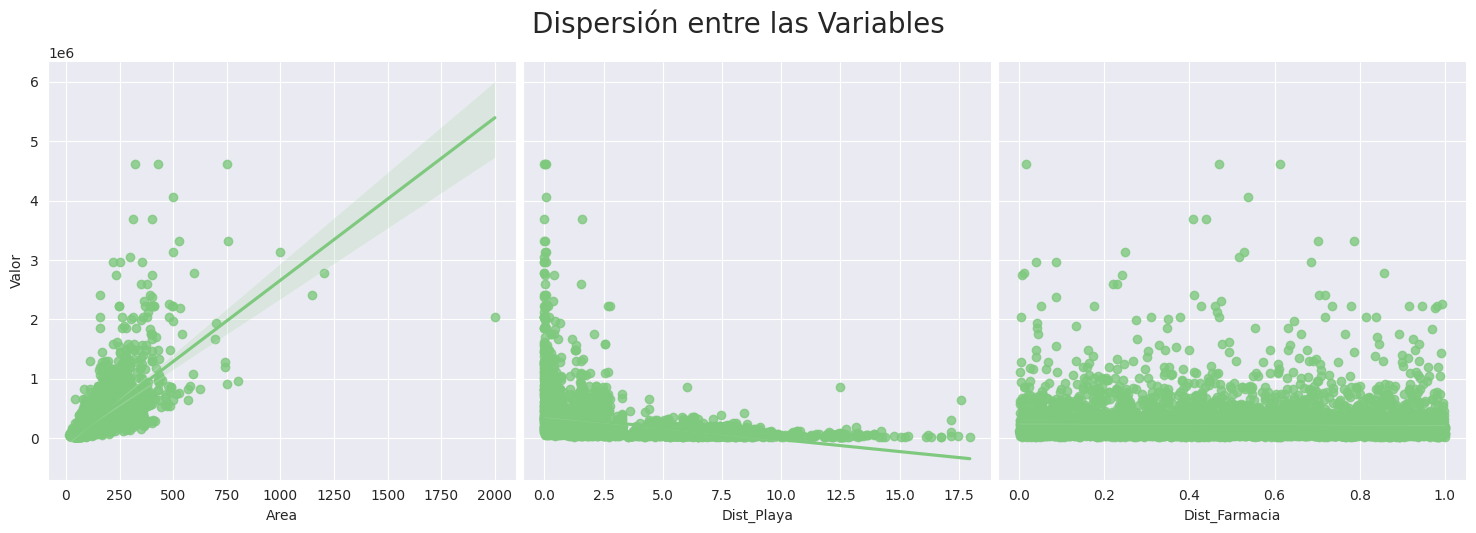

In [12]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

## Luri:
¡Hola! En esta clase, estamos explorando si existe una relación lineal entre el precio de las propiedades (nuestra variable dependiente) y características como el área, la distancia a la playa y la distancia a la farmacia (nuestras variables explicativas).

Imagina que estás tratando de predecir cuánto costará un helado basándote en dos cosas: `la cantidad de bolas` que pidas y la `temperatura del día`.

* ### Cantidad de bolas (Área de la propiedad):

 Intuitivamente, esperarías que haya una relación lineal. Más bolas significan un precio más alto. Si graficas esto, verías una línea ascendente.

* ### Temperatura del día (Distancia a la playa):

 Aquí, la relación podría no ser tan directa. Tal vez en días muy calurosos, la gente está dispuesta a pagar un poco más, pero no es una línea recta perfecta. Podría haber una curva.

* ### Distancia a la farmacia (Distancia a la farmacia):

 Es probable que no haya ninguna relación. El hecho de que haya una farmacia cerca no afecta el precio del helado. Los puntos en el gráfico estarían dispersos sin ninguna dirección clara.

En la clase, usamos gráficos de dispersión (pairplots) para "visualizar" estas relaciones. Es como mirar los gráficos de helado para ver si nuestras suposiciones son correctas. Si los puntos forman una línea más o menos recta, hay una relación lineal. Si están dispersos o forman una curva, la relación no es lineal.

Encontramos que el precio de las propiedades no tiene una relación lineal clara con las características que estamos observando. Es como si tratar de predecir el precio del helado basándote solo en la temperatura y la distancia a la farmacia no te diera buenos resultados.

Por eso, en la próxima clase, vamos a "transformar" los datos. Es como si cambiáramos la forma en que medimos las cosas para ver si podemos encontrar una relación lineal oculta. En lugar de usar la temperatura directamente, podríamos usar algo como `"cuántas personas sudan por minuto"`. ¡A veces, un pequeño cambio de perspectiva puede revelar patrones ocultos!

##  07 Relación entre las variables dependiente y explicativas
Califique las siguientes afirmaciones y responda:

1\)-La función `pairplot()`, del paquete `seaborn`, permite graficar solo los histogramas de las variables de un DataFrame;

2\)-Los diagramas de dispersión permiten identificar la relación entre dos variables;

3\)-Es posible trazar una recta de regresión entre dos variables usando la función pairplot() de seaborn.

* ### Solo las declaraciones 2 y 3 son correctas.


¡Correcta! Usando diagramas de dispersión, podemos identificar si dos variables tienen una relación lineal entre ellas y también la dirección de esta relación.

## Luri:
¡Por supuesto!

Piense en la relación entre las horas de estudio y las notas de un examen. Generalmente, cuanto más estudia un estudiante, mejor será su nota. Podemos representar esto en un diagrama de dispersión donde el eje x representa las horas de estudio y el eje y representa las notas del examen.

Si vemos que los puntos en el diagrama tienden a subir de izquierda a derecha, esto indica una relación lineal positiva: a medida que aumentan las horas de estudio, también aumentan las notas.

¿Qué tal si piensas en otro ejemplo donde dos variables puedan estar relacionadas linealmente?

##  08 Haga lo que hicimos en aula: Análisis gráfico
Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante este video:

* **Importar la biblioteca seaborn**

* **Configurar el formato de los gráficos**

* **Construir el box-plot de la variable dependiente**

* **Graficar la distribución de frecuencias de la variable dependiente**

* **Graficar los diagramas de dispersión entre las variables del dataset**

* **Analizar la dispersión entre las variables**

* **Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo que se vio en los videos para poder continuar con el siguiente video.**


## Luri:
¡Hola! Imagina que estás cocinando una receta nueva. Primero, necesitas todos los ingredientes y utensilios (como importar la biblioteca seaborn). Luego, preparas tu espacio de trabajo para que sea agradable y funcional (configurar el formato de los gráficos). Después, te enfocas en el ingrediente principal, asegurándote de que esté en perfectas condiciones (construir el box-plot de la variable dependiente).

A continuación, ves cómo se comporta ese ingrediente al cocinarlo (graficar la distribución de frecuencias). Finalmente, observas cómo interactúa con otros ingredientes para crear el plato final (graficar los diagramas de dispersión y analizar la dispersión entre las variables). ¡Espero que esta analogía te ayude a entender mejor los pasos! Si tienes más preguntas, no dudes en preguntar. ¡Estoy aquí para ayudarte!

##  09 Lo que aprendimos
Lo que aprendimos en esta aula:

* **Como configurar el formato de los gráficos.**

* **Como construir el box-plot de la variable dependiente.**

* **Como graficar la distribución de frecuencias de la variable dependiente.**

* **Como graficar los diagramas de dispersión entre las variables del dataset.**

* **Análisis de dispersión entre las variables.**
----

# 3 - Transformaciones de variables

## 02 - Transformando los datos


# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [13]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [14]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


In [15]:
np.log(1)

np.float64(0.0)

In [16]:
np.log(0) # min	13863.00	16.00	0.00	0.00

/tmp/ipykernel_4952/2752058522.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0) # min	13863.00	16.00	0.00	0.00


np.float64(-inf)

In [18]:
datos['log_Valor']=np.log(datos['Valor'])
datos['log_Area']=np.log(datos['Area'])
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1)
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1)

In [19]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


## Distribuición de frecuencias de la variable *dependiente transformada* (y)

/tmp/ipykernel_4952/2855196549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos['log_Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='log del Precio de los Inmuebles', ylabel='Density'>

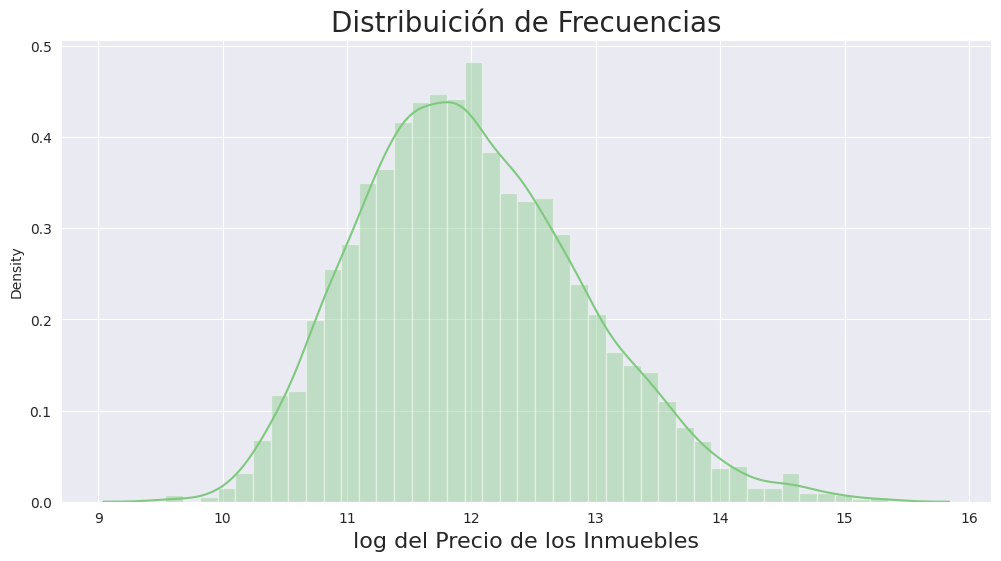

In [20]:
ax=sns.distplot(datos['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

## Luri:
¡Hola! En esta clase, estamos abordando un problema común en el modelado de datos: la asimetría en la distribución de una variable y la falta de relación lineal entre variables. Para solucionarlo, estamos utilizando una técnica llamada `transformación logarítmica`.

Imagina que tienes un grupo de personas y quieres analizar sus ingresos. Sin embargo, descubres que la mayoría tiene ingresos bajos o medios, pero hay unos pocos con ingresos extremadamente altos. Esto crea una `distribución asimétrica`, con una `"cola" larga hacia la derecha en el histograma`.

Ahora, imagina que quieres encontrar una relación entre los ingresos de las personas y su nivel de educación. Sin embargo, debido a la asimetría en los ingresos, no encuentras una relación lineal clara.

Aquí es donde entra en juego la transformación logarítmica. Es como aplicar un "filtro" a los datos de ingresos, reduciendo la influencia de los valores extremos y "estirando" los valores más bajos. Esto ayuda a que la distribución sea más simétrica y se acerque a una distribución normal.

Al aplicar la transformación logarítmica, es posible que encuentres una relación lineal más clara entre los ingresos transformados y el nivel de educación. Esto se debe a que la transformación reduce el impacto de los valores atípicos y permite que la relación subyacente se revele con mayor claridad.

En resumen, la transformación logarítmica es como una herramienta que nos ayuda a "normalizar" los datos y encontrar relaciones lineales ocultas entre variables. Al igual que un filtro de cámara puede mejorar una imagen, `la transformación logarítmica puede mejorar la calidad de nuestros modelos de datos`.

¿Te gustaría que te proporcionara algunos ejercicios o ejemplos adicionales para practicar la transformación logarítmica?

##  03 ¿Por qué transformar los datos?
Acerca de la transformación de datos, marque la alternativa correcta:

* ### Una de las principales razones para transformar algunos tipos de datos es intentar corregir la asimetría que la distribución de los datos pueda presentar.

¡Correcta! Este fue el principal objetivo de la transformación que llevamos a cabo en nuestro curso.



## Luri - Ejemplo. 
¡Por supuesto!

Imagina que estás analizando los ingresos de las personas en una ciudad. Es común que haya algunas personas con ingresos muy altos que "jalan" el promedio hacia arriba, creando una distribución asimétrica con una cola larga hacia la derecha.

Si aplicas una transformación logarítmica a los datos de ingresos, puedes comprimir los valores más altos y expandir los valores más bajos. Esto puede ayudar a que la distribución se parezca más a una distribución normal, lo que facilita el análisis y la interpretación de los datos.

En este caso, la transformación logarítmica ayuda a reducir la influencia de los valores atípicos y a revelar patrones subyacentes en los datos que podrían estar ocultos debido a la asimetría.

## 04 Comprobando la relación lineal


# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

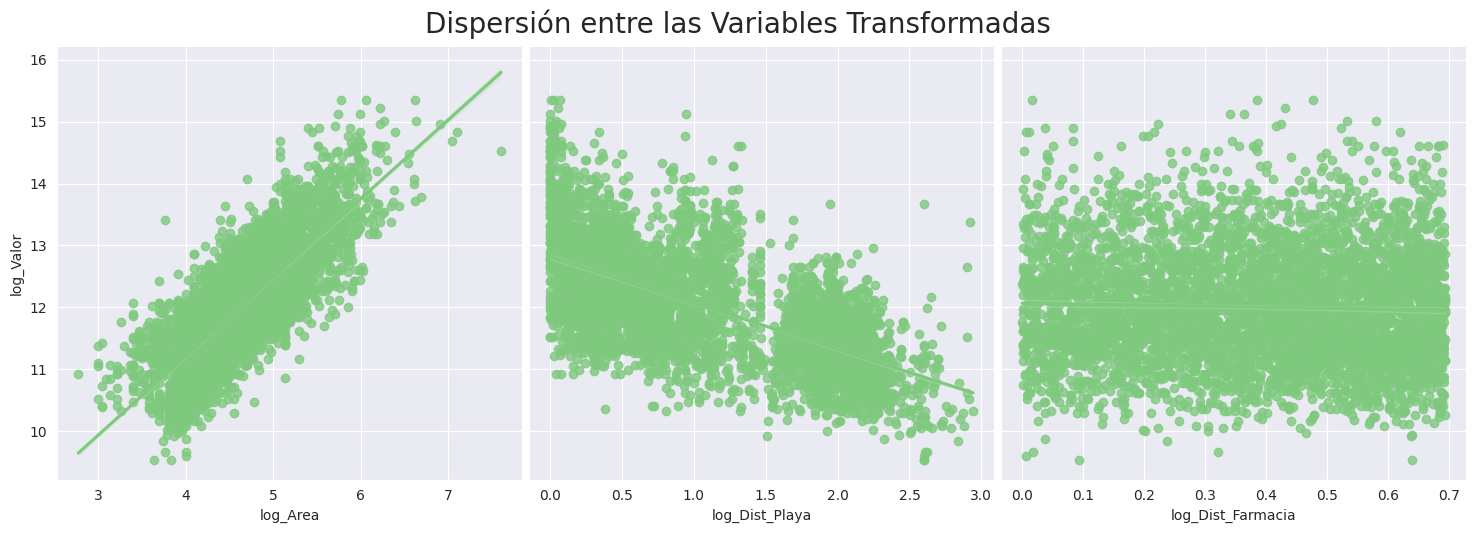

In [21]:
ax=sns.pairplot(datos,y_vars='log_Valor',x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

## Luri:
¡Hola! En esta clase, estamos explorando cómo transformar variables para mejorar la relación lineal en nuestro modelo de regresión. Imagina que estás tratando de entender cómo el tamaño de una casa (Área) y la distancia a la playa (Dist_Playa) afectan su valor (Valor).

* ## La transformación logarítmica como un filtro de Instagram:

* ### Situación inicial: 
Al principio, tienes fotos (datos) que no se ven muy bien. Algunas están muy oscuras, otras muy claras, y en general, no hay una armonía.

* ### El filtro (transformación logarítmica):
 Aplicas un filtro logarítmico a todas las fotos. Este filtro ajusta los colores y la iluminación de cada foto, haciendo que todas se vean más equilibradas y agradables a la vista.

* ### Resultado:
 Ahora, las fotos se ven mucho mejor y más consistentes. De manera similar, la transformación logarítmica ayuda a que la distribución de los datos sea más normal y reduce la asimetría, lo que facilita la identificación de relaciones lineales.

* ## Gráficos de dispersión como mapas de carreteras:

* ### Situación inicial:
 Quieres saber cómo el tamaño de una casa y la distancia a la playa afectan su valor. Para ello, dibujas un mapa donde cada casa es un punto, y su posición en el mapa depende de su tamaño y distancia a la playa.

* ### El mapa inicial (variables originales):
 Al principio, los puntos están dispersos por todas partes, sin un patrón claro. Es difícil ver si hay una relación entre el tamaño, la distancia y el valor.

* ### El mapa transformado (variables transformadas):
 Después de aplicar la transformación logarítmica, los puntos en el mapa se organizan de manera más ordenada. Ahora puedes ver claramente que a medida que aumenta el tamaño de la casa, su valor también aumenta (relación lineal positiva), y que a medida que aumenta la distancia a la playa, el valor disminuye (relación lineal negativa).

* ### La eliminación de variables como la poda de un jardín:

* ### Situación inicial:
 Tienes un jardín con muchas plantas, pero algunas no están creciendo bien y están afectando a las demás.

* ### La poda (eliminación de variables):
 Decides quitar las plantas que no están contribuyendo al jardín. En nuestro caso, la variable "Dist_Farmacia" no muestra una relación lineal clara con el valor de la casa, por lo que es como una planta que no está creciendo bien.

* ### Resultado:
 Al quitar estas plantas, el jardín se ve más saludable y las plantas restantes pueden crecer mejor. De manera similar, al eliminar variables que no tienen una relación lineal clara, el modelo de regresión se vuelve más preciso y fácil de interpretar.
 
¿Te gustaría que te proporcione algunos ejercicios o ejemplos adicionales para practicar la comprobación de relaciones lineales con variables transformadas?

##  05 Un poco más sobre las transformaciones logarítmicas
Usamos la biblioteca numpy para realizar la transformación de datos. numpy es un paquete fundamental para la computación científica en Python, que proporciona un conjunto muy amplio de operaciones matriciales y matemáticas.

Con base en nuestros videos, marque la opción que muestra la forma correcta de realizar la transformación logarítmica de la variable Valor, del DataFrame datos. Suponga que esta variable tiene algunos registros con valor cero.

In [ ]:
import numpy as np
np.log(datos['Valor'] + 1)

¡Correcta! Como la variable tiene valores cero en algunos registros, la forma más correcta de transformación es agregar una constante, diferente de cero, a los datos, para evitar la pérdida de información, ya que log(0) no existe.

## Luri:
¡Hola! Claro, puedo ayudarte con eso.

Imagina que tienes un jardín donde algunas plantas son muy altas y otras muy bajas. La transformación logarítmica es como usar unas gafas especiales que te permiten ver todas las plantas de una manera más equilibrada, reduciendo la diferencia visual entre las plantas más altas y las más bajas.

En este caso, la variable "Valor" en tu DataFrame "datos" es como el conjunto de plantas en tu jardín. Algunas casas tienen valores muy altos y otras muy bajos. Si hay casas con valor cero, es como si tuvieras algunas plantas que no han crecido en absoluto.

La función np.log() de NumPy es como esas gafas especiales que te ayudan a ver los valores de las casas de manera más uniforme. Al sumar 1 a la variable "Valor" antes de aplicar el logaritmo, es como si le dieras un pequeño impulso a todas las plantas, asegurándote de que incluso las que no han crecido (valor cero) tengan una pequeña altura para que puedas verlas con las gafas especiales.

¿Te sirvió la analogía para entender mejor el enunciado?

##  06 Haga lo que hicimos en aula: Transformación de variables
Consolidando su conocimiento

Es hora de que sigas todos los pasos que he dado durante este video:

* **Importar la biblioteca numpy**

* **Aplicar la transformación logarítmica a los datos del dataset** 

* **Graficar la distribución de frecuencias de la variable dependiente transformada**

* **Graficar los diagramas de dispersión entre las variables transformadas del dataset**

* **Analizar la dispersión entre las variables transformadas**

* **Si ya lo ha hecho, excelente. Si no es así, es importante que ejecutes lo que se vio en los videos para poder continuar con el siguiente video.**

##  07 Lo que aprendimos

Lo que aprendimos en esta aula:

* **Como aplicar la transformación logarítmica a los datos del dataset.**

* **Como graficar la distribución de frecuencias de la variable dependiente transformada.**

* **Como graficar los diagramas de dispersión entre las variables transformadas del dataset.**

* **Cómo analizar la dispersión entre las variables transformadas.**
---

# 4 - Regresión lineal con StatsModels

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [23]:
y=datos['log_Valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [24]:
X=datos[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

## Luri:
¡Hola! En esta clase, estamos aprendiendo cómo dividir nuestros datos en dos grupos: uno para entrenar nuestro modelo (como enseñarle a un perro nuevos trucos) y otro para probar qué tan bien aprendió (como ver si el perro realmente entiende los trucos en un entorno diferente).

### Preparando los Datos (Ingredientes):

Imagina que tienes una receta para hacer un pastel. Necesitas ingredientes (datos) como harina, huevos y azúcar.

* ### En nuestro caso, los "ingredientes" son los datos de las propiedades:

 `log_Area`, `log_Dist_Playa` y `log_Dist_Farmacia` (variables explicativas o características) y el `log_Valor` (variable dependiente o lo que queremos predecir).

* ### Dividiendo los Datos (Separando para Probar):

Antes de hornear el pastel completo, quieres probar si la receta está bien. Entonces, separas una pequeña porción de los ingredientes.

## Usamos `train_test_split` para dividir los datos en dos partes:

* ### Conjunto de Entrenamiento `(X_train, y_train)`:

 La mayor parte de los ingredientes que usaremos para hacer el pastel (entrenar el modelo).

* ### Conjunto de Prueba `(X_test, y_test)`:

 Una pequeña porción reservada para probar si el pastel quedó bien (evaluar el modelo).

### Entrenando el Modelo (Horneando el Pastel):

Usamos el conjunto de entrenamiento (la mayor parte de los ingredientes) para "hornear" nuestro modelo. Esto significa que le mostramos al modelo los datos y le enseñamos a encontrar patrones.

En nuestro caso, el modelo aprende cómo las características de las propiedades (área, distancia a la playa, distancia a la farmacia) se relacionan con el valor de la propiedad.

### Evaluando el Modelo (Probando el Pastel):

Una vez que el pastel está horneado, lo probamos con la porción reservada (conjunto de prueba) para ver si está delicioso.

Usamos el conjunto de prueba para ver qué tan bien predice el modelo los valores de las propiedades que no ha visto antes.

## Parámetros de la Función train_test_split:

* **test_size=0.2:**

 Indicamos que queremos usar el 20% de los datos para la prueba.

* **random_state=2811:**

 Es como una `"semilla"` para asegurarnos de que siempre dividamos los datos de la misma manera cada vez que ejecutemos el código. Esto es útil para que los resultados sean reproducibles.

¿Te gustaría que te proporcione algunos ejercicios o ejemplos adicionales para practicar la creación de conjuntos de entrenamiento y prueba?

##  03 Procedimiento estándar en Data Science

La técnica de separar aleatoriamente un dataset en dos conjuntos distintos (conjuntos de entrenamiento y de prueba), estimar el modelo con datos de uno de estos conjuntos (conjunto de entrenamiento) y luego realizar predicciones con datos del segundo conjunto (conjunto de prueba), es una técnica ampliamente utilizada en data science para confirmar la efectividad de los modelos estimados.

Indique, en las opciones siguientes, qué funcionalidad de scikit-learn usamos para realizar dicha separación de datos.

## train_test_split()

¡Correcta! Para obtener más información sobre la función, acceda a la documentación de la biblioteca.(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## Luri:
¡Por supuesto! Aquí tienes un ejemplo de cómo puedes usar la función `train_test_split` en Python con la biblioteca scikit-learn. Este ejemplo te ayudará a entender mejor cómo funciona y cómo puedes aplicarla a tus propios conjuntos de datos.

* ### Ejemplo Práctico

Supongamos que tienes un conjunto de datos con información sobre casas y quieres predecir sus precios. Primero, necesitarás cargar tus datos y prepararlos para el modelo.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Paso 1: Cargar los datos
# Asumimos que tienes un archivo CSV llamado 'casas.csv'
datos = pd.read_csv('casas.csv')

# Paso 2: Definir las variables dependientes e independientes
# 'precio' es la variable que queremos predecir
# 'area', 'habitaciones', 'ubicacion' son las características que usaremos para predecir el precio
X = datos[['area', 'habitaciones', 'ubicacion']]  # Variables independientes
y = datos['precio']  # Variable dependiente

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 indica que el 20% de los datos se usarán para pruebas
# random_state=42 asegura que la división sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Imprimir las dimensiones de los conjuntos resultantes
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

### Explicación Detallada

1. **Importar las bibliotecas necesarias:**

pandas se utiliza para cargar y manipular los datos en un formato de DataFrame.
train_test_split de sklearn.model_selection es la función que dividirá los datos.

2. **Cargar los datos:**

`pd.read_csv('casas.csv')` lee los datos desde un archivo CSV llamado casas.csv y los guarda en un DataFrame llamado datos.

3. **Definir las variables dependientes e independientes:**

`X = datos[['area', 'habitaciones', 'ubicacion']]` crea un DataFrame X con las características que se usarán para predecir el precio de las casas.

`y = datos['precio']` crea una Serie y con los precios de las casas, que es la variable que queremos predecir.

4. **Dividir los datos en conjuntos de entrenamiento y prueba:**

* `train_test_split(X, y, test_size=0.2, random_state=42)` divide los datos en cuatro conjuntos:

`X_train`: Características para el conjunto de entrenamiento.
`X_test`: Características para el conjunto de prueba.
`y_train`: Variable dependiente para el conjunto de entrenamiento.
`y_test`: Variable dependiente para el conjunto de prueba.
`test_size=0.2` indica que el `20%` de los datos se usarán para el conjunto de prueba.
`random_state=42` asegura que la división sea reproducible. Si usas el mismo valor para random_state, siempre obtendrás la misma división de los datos.

5. **Imprimir las dimensiones de los conjuntos resultantes:**

Las líneas `print("Dimensiones de X_train:", X_train.shape)` imprimen las dimensiones de los conjuntos resultantes. Esto te permite verificar que la división se realizó correctamente y que tienes suficientes datos en cada conjunto.

¿Por qué es útil este ejemplo?

**Claridad**: Muestra cómo preparar tus datos antes de usar train_test_split.

**Reproducibilidad**: Utiliza `random_state` para asegurar que siempre obtengas la misma división de los datos.

**Verificación**: Imprime las dimensiones de los conjuntos resultantes para que puedas verificar que la división se realizó correctamente.

¿Te gustaría que te explique algún paso en más detalle o que te dé otro ejemplo con un conjunto de datos diferente?

## 04 Trabajando con StatsModels


# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [26]:
import statsmodels.api as sm

## Estimando el modelo con statsmodels

In [27]:
X_train_con_constante=sm.add_constant(X_train)

In [28]:
X_train_con_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [29]:
modelo_statsmodels=sm.OLS(y_train,X_train_con_constante,hascont=True).fit()

/home/pol/.pyenv/versions/3.10.13/envs/api-env/lib/python3.10/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [30]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:15:17   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

## Luri:
¡Hola! En esta clase, aprendemos a evaluar la calidad de nuestro modelo de regresión lineal usando herramientas estadísticas. Aquí te presento algunas analogías para entender mejor los conceptos:

* ### R2 y R2 Ajustado:
Imagina que estás tratando de predecir qué tan bien un estudiante va a rendir en un examen final.
* ### R2:
 Es como la cantidad de información que tus variables (horas de estudio, asistencia a clase) explican sobre el resultado del examen. Si obtienes un R2 alto, significa que tus variables son buenas para predecir el rendimiento.
* ### R2 Ajustado:
 Es como el R2, pero con una penalización por usar variables inútiles. Si incluyes variables que no influyen en el resultado (como el color de la camisa del estudiante), el R2 ajustado disminuirá, indicando que esas variables no aportan valor.
* ### Test F:
Piensa en un equipo de fútbol donde cada jugador (variable) contribuye al éxito del equipo (modelo).
* ### Test F:
 Es como preguntarse si el equipo en su conjunto es efectivo. La hipótesis nula es que ningún jugador contribuye (todos los coeficientes son cero), y la hipótesis alternativa es que al menos un jugador sí contribuye. Si el test F es significativo, significa que al menos uno de los jugadores (variables) es importante para el éxito del equipo.
* ### Test T:
Siguiendo con el equipo de fútbol, ahora quieres saber qué tan bien juega cada jugador individualmente.
* ### Test T:
 Es como evaluar el desempeño de cada jugador por separado. La hipótesis nula es que el jugador no hace ninguna diferencia (el coeficiente es cero), y la hipótesis alternativa es que el jugador sí hace una diferencia. Si el test T es significativo para un jugador, significa que ese jugador es importante para el equipo.
* ### P-valor:
Imagina que estás jugando a los dardos y quieres saber si eres bueno apuntando al centro.
* ### P-valor:
 Es la probabilidad de obtener los resultados que obtuviste (o resultados más extremos) si realmente no tuvieras habilidad. Un P-valor bajo (menor que 0.05) significa que es poco probable que hayas obtenido esos resultados por casualidad, así que puedes concluir que sí tienes habilidad. En el contexto de los tests, un P-valor bajo significa que la variable es significativa.
En resumen, estas herramientas estadísticas nos ayudan a evaluar si nuestro modelo es bueno en su conjunto `(Test F)` y si cada variable individualmente contribuye al modelo `(Test T)`, ajustando por la complejidad del modelo `(R2 Ajustado)` y utilizando el `P-valor` para tomar decisiones informadas.

¿Te gustaría que profundicemos en alguno de estos conceptos o veamos algún ejemplo adicional?

##  05 Estimando un modelo de regresión lineal con StatsModels
`statsmodels` es un módulo de Python que proporciona clases y funciones para estimar muchos modelos estadísticos diferentes, así como para realizar pruebas estadísticas y minería de datos.

Basado en nuestro último vídeo, indique la alternativa que muestra el código necesario para estimar un modelo de regresión lineal con la biblioteca statsmodels.

Nota: `y_train` y `X_train` son los datasets de entrenamiento para crear nuestro modelo.



In [ ]:

import statsmodels.api as sm
X_train_con_constante = sm.add_constant(X_train)
modelo_statsmodels = sm.OLS(y_train, X_train_con_constante, hasconst = True).fit()

¡Hola! Me alegra saber que estás estudiando y practicando.

Recuerda que mi objetivo es ayudarte a comprender los conceptos y no darte las respuestas directamente.

Pero puedo darte algunas pistas:

Revisa el video nuevamente, prestando atención a cómo se construye el modelo paso a paso.
Compara las opciones con el código del video, identificando las diferencias y similitudes.
Presta atención al orden de los parámetros en la función `sm.OLS()`.
Recuerda que el método `.fit()` es necesario para ajustar el modelo a los datos.
Si aún tienes dudas después de revisar el video y comparar las opciones, no dudes en preguntar. ¡Estoy aquí para ayudarte!

## 06 Evaluando el modelo estimado


## Luri:
¡Hola! Claro, puedo ayudarte con eso.

En esta clase, estamos aprendiendo a usar la biblioteca statsmodels en Python para realizar regresión lineal. Imagina que estás tratando de predecir el precio de una casa basándote en su tamaño.

### Analogía:

* **Scikit-learn:** Imagina que scikit-learn es como una caja negra que te da la respuesta directamente. Le das los datos de entrada (tamaño de la casa) y te da la predicción del precio. No te preocupas por lo que sucede dentro de la caja.

* **Statsmodels:** Statsmodels, por otro lado, es como tener un experto en estadística que te explica todo el proceso. No solo te da la predicción del precio, sino que también te muestra pruebas estadísticas detalladas para que puedas entender qué tan bien funciona tu modelo y qué variables son más importantes.
¿Por qué usar statsmodels?

En el curso anterior, usamos `scikit-learn`, que es genial para obtener resultados rápidos. Pero ahora, queremos profundizar y entender mejor nuestro modelo. Statsmodels nos da las herramientas para hacer esto.

* **El modelo log-lineal:**

Imagina que al principio intentas dibujar una línea recta entre el tamaño de la casa y el precio, pero los puntos están muy dispersos. Entonces, decides transformar los datos usando logaritmos para que la relación sea más lineal. Esto es como usar un lente especial que te permite ver la relación de manera más clara.

* **Añadir la constante:**

En statsmodels, necesitamos añadir explícitamente una constante al modelo. Piensa en esto como asegurarte de que tu modelo tenga un punto de partida. Si no añades la constante, es como si tuvieras una regla que no empieza en cero, lo que puede dar lugar a mediciones incorrectas.

* **En resumen:**

`Statsmodels` es como tener un laboratorio completo para analizar tu modelo de regresión lineal. Te da las herramientas para entender cada detalle y asegurarte de que tus predicciones sean precisas y confiables.

¿Te gustaría que te diera un ejemplo más detallado o que te explicara algún concepto en particular?

##  07 Pruebas formales de regresión lineal
La biblioteca statsmodels proporciona un conjunto más amplio de estadísticas de prueba sobre sus outputs. En nuestro curso, destacaremos las pruebas F y t.

Según lo que aprendimos en nuestro último video, juzgue los elementos a continuación y marque las alternativas correctas.

* ### La prueba t se usa para probar la significancia de cada parámetro individualmente.
¡Correcta! Prueba la hipótesis de que el coeficiente es igual a cero.

* ### La prueba F se utiliza para probar simultáneamente la importancia de un conjunto de parámetros.
¡Correcta! Prueba la hipótesis de que todos los coeficientes de regresión son iguales a cero.



## Luri:
¡Hola! Claro, puedo ayudarte con eso.

Imagina que estás cocinando una sopa y quieres asegurarte de que cada ingrediente que agregas realmente mejora el sabor general.

* ### Prueba F:
 Es como probar la sopa después de agregar un grupo de ingredientes (por ejemplo, todas las verduras) para ver si, en conjunto, realmente hicieron la sopa más sabrosa. No estás probando cada verdura por separado, sino el impacto del grupo completo. Si la sopa mejora significativamente, sabes que al menos uno de los ingredientes del grupo es útil.

* ### Prueba t:
 Es como probar cada ingrediente individualmente (una pizca de sal, una hoja de laurel) para ver si realmente hace una diferencia notable en el sabor. Estás aislando el efecto de cada ingrediente para ver si es esencial o si puedes omitirlo sin que la sopa pierda calidad.

* ### En el contexto del ejercicio:

La prueba F evalúa si el modelo en su conjunto es significativo, es decir, si al menos una de las variables explicativas está influyendo en la variable dependiente.
La prueba t evalúa la significancia de cada variable explicativa individualmente, determinando si cada una de ellas tiene un impacto real y significativo en el modelo.
¿Te sirvió la analogía para entender mejor el enunciado?

##  08 Interpretando las pruebas
Solo para ilustrar, considere el output del modelo estimado:

![regresion-2.png](/home/pol/Escritorio/ipynb-alura/assets/regersion-2.png)

Aprendemos a identificar cuándo las pruebas t y F indican que todo es correcto, y luego podemos rechazar la hipótesis de que los parámetros no son significativos individual y conjuntamente. Indique la alternativa que presenta la forma correcta de llegar a esta conclusión.

![regresion-3.png](/home/pol/Escritorio/ipynb-alura/assets/regresion-3.png)

## 09 Modificando el modelo y evaluando el ajuste


# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font> 
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

In [31]:
X=datos[['log_Area','log_Dist_Playa']]

## Creando los datasets de entrenamiento y de prueba

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2811)

## Estimando el modelo con el statsmodels

In [33]:
X_train_con_constante=sm.add_constant(X_train)

In [34]:
modelo_statsmodels=sm.OLS(y_train,X_train_con_constante,hascont=True).fit()

/home/pol/.pyenv/versions/3.10.13/envs/api-env/lib/python3.10/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [35]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:17:41   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [ ]:
modelo=LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print('R²={}'.format(modelo.score(X_train,y_train).round(3)))

R²=0.805


## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_predicho=modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(3)))

R²=0.79


# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [ ]:
entrada=X_test[0:1]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando predicción puntual

In [ ]:
modelo.predict(entrada)[0]

12.59657080819777

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [ ]:
np.exp(modelo.predict(entrada)[0])

295543.3507747175

## Creando un simulador simple

In [ ]:
Area=150
Dist_Playa=1
entrada=[[np.log(Area),np.log(Dist_Playa+1)]]

print('US$ {}'.format(np.exp(modelo.predict(entrada)[0]).round(2)))

US$ 299013.68


# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [ ]:
modelo.intercept_

7.646667897902707

In [ ]:
np.exp(modelo.intercept_)

2093.657672537763

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

In [ ]:
modelo.coef_

array([ 1.05807806, -0.49061238])

## Confirmando el orden de las variables explicativas en el DataFrame

In [ ]:
X.columns

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [ ]:
index=['Intercepto','log Área', 'log Distancia a la playa']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parámetros'])

,Parámetros
Intercepto,7.646668
log Área,1.058078
log Distancia a la playa,-0.490612


## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [ ]:
y_predicho_train=modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

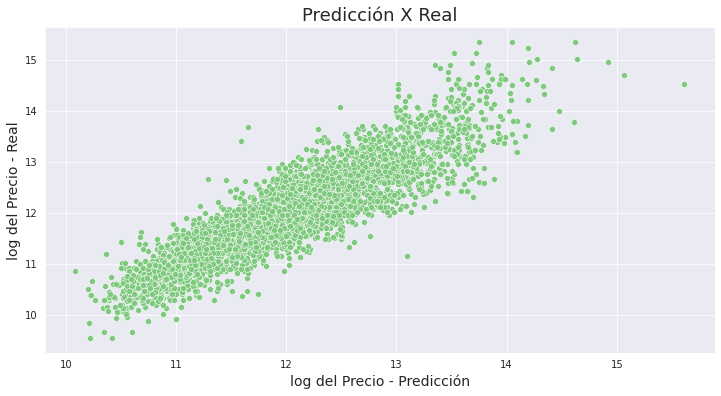

In [ ]:
ax=sns.scatterplot(x=y_predicho_train,y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

## Obteniendo los residuos

In [ ]:
residuo=y_train-y_predicho_train

## Graficando la distribuición de frecuencias de los residuos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


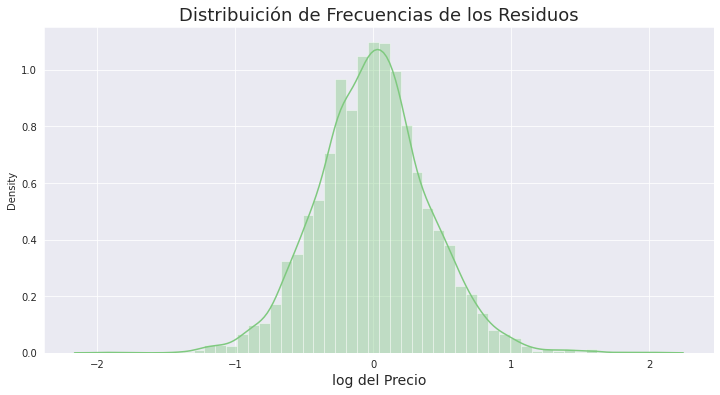

In [ ]:
ax=sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax